In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 75 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 20
symbols = ['^W5000', '^IXIC']
tickers = {'^W5000': 'wilshire',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv',
         '^W5000': '../data/wilshire1990.csv'}

ITERS: 1





WILSHIRE


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2002-02-01
Successfully loaded params from ../data/pct_params/wilshire_20yr_3param.json
{   'params': {   'amounts': [   -0.9730000530101742,
                                 0.802049531427812,
                                 0.9527891142103105],
                  'qs': [   -0.721748328060181,
                            -0.4818671600436522,
                            -0.5647548713917969]},
    'sd': 0.01642428790540115,
    'window': 339}
 1: Final value: $59426.76 (window = 339; sd = 0.016)

% in now: 0.9905869000946428
Actions taken: 227
Wrote params to ../data/pct_params/wilshire_20yr_3param.json


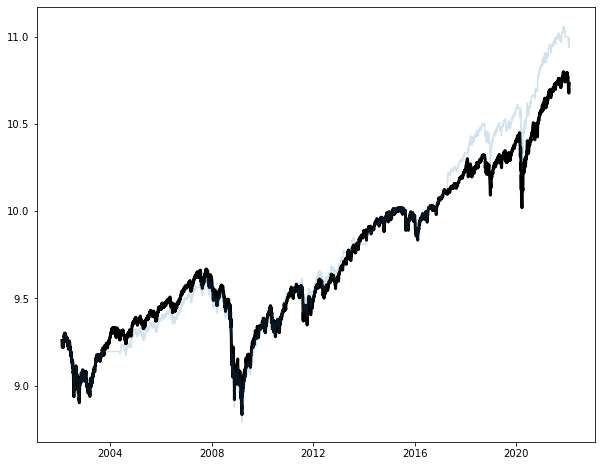

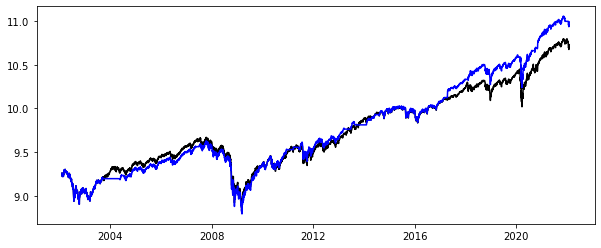

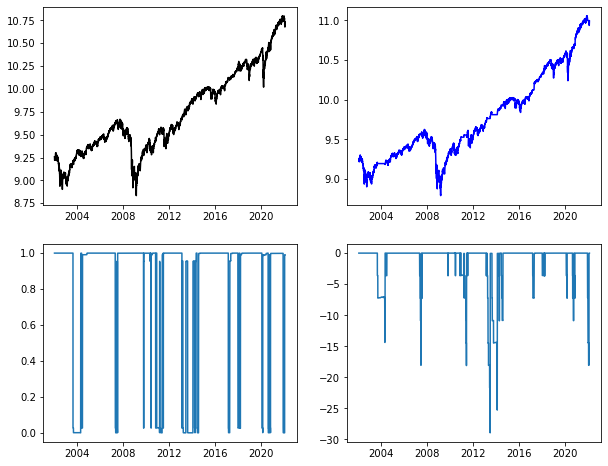



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2002-02-01
Successfully loaded params from ../data/pct_params/wilshire_20yr_2param.json
{   'params': {   'amounts': [-0.21731317131931824, 0.99],
                  'qs': [-0.7473764824073751, -0.6343742494359275]},
    'sd': 0.008046303206570597,
    'window': 113}
 1: Final value: $48643.52 (window = 113; sd = 0.008)

% in now: 0.9999449972821695
Actions taken: 220
Wrote params to ../data/pct_params/wilshire_20yr_2param.json


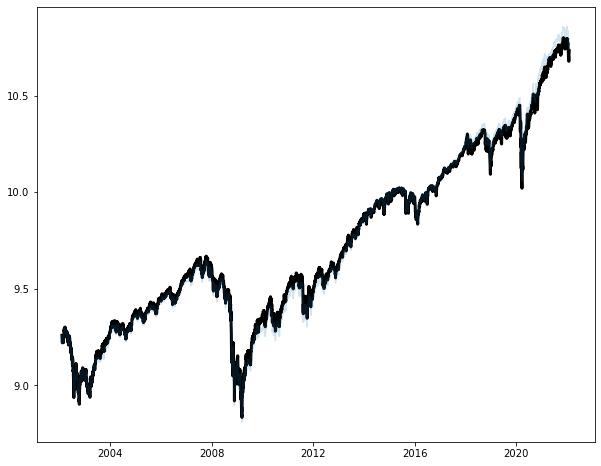

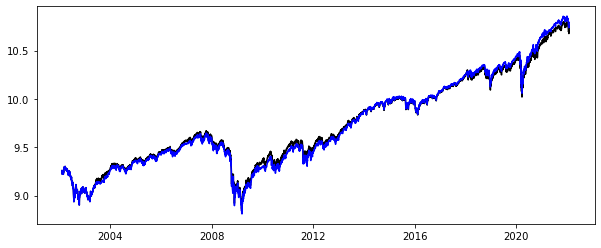

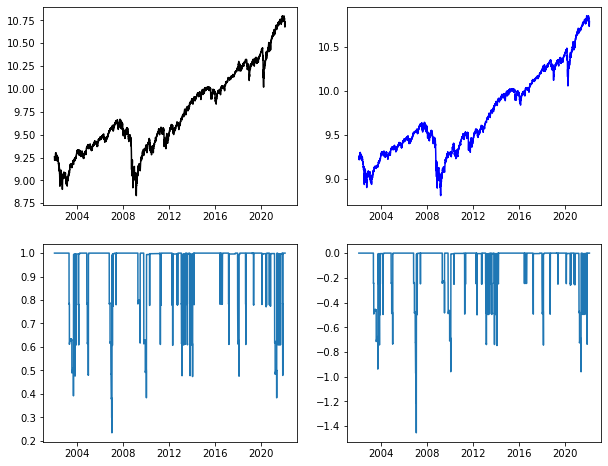



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2002-02-01
Successfully loaded params from ../data/pct_params/wilshire_20yr_1param.json
{   'params': {'amounts': [0], 'qs': [0.5843839180475214]},
    'sd': 0.04775669995519248,
    'window': 20}
 1: Final value: $45806.20 (window = 20; sd = 0.048)

% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/wilshire_20yr_1param.json


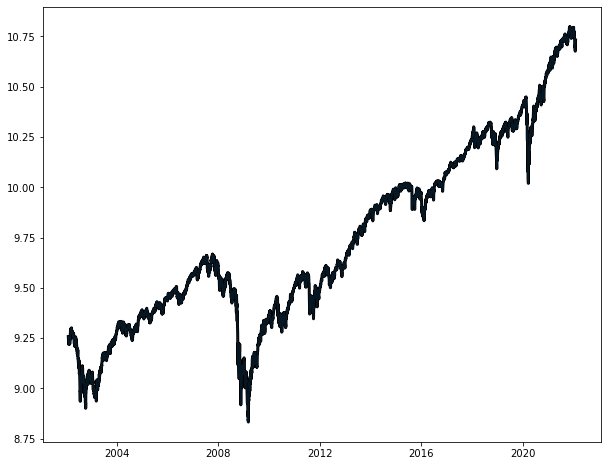

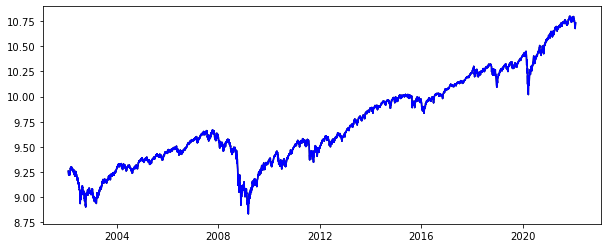

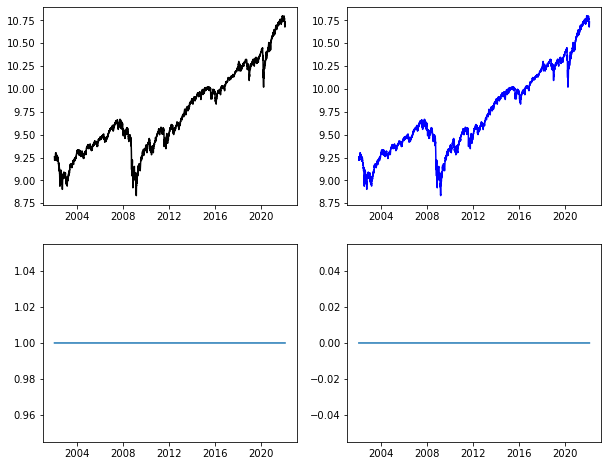




NASDAQ


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2002-02-01
Successfully loaded params from ../data/pct_params/nasdaq_20yr_3param.json
{   'params': {   'amounts': [-0.831576859303771, 0.8642968234412084, 0.99],
                  'qs': [   0.1557394799944677,
                            0.04836662608253527,
                            0.22038773236021322]},
    'sd': 0.23845321005875816,
    'window': 70}
 1: Final value: $27716.63 (window = 70; sd = 0.238)

% in now: 0.887107336786531
Actions taken: 233
Wrote params to ../data/pct_params/nasdaq_20yr_3param.json


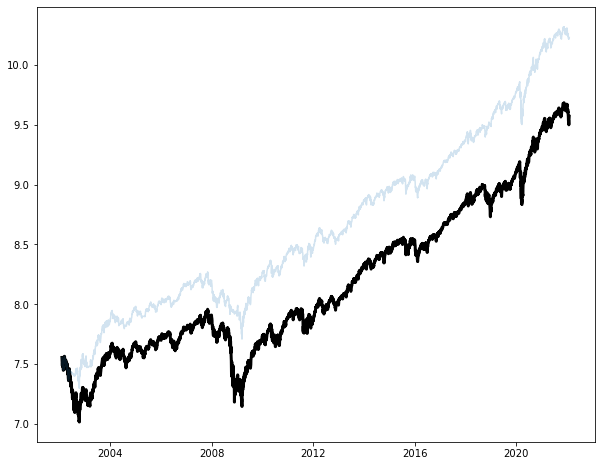

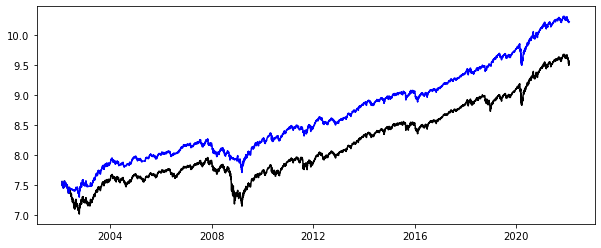

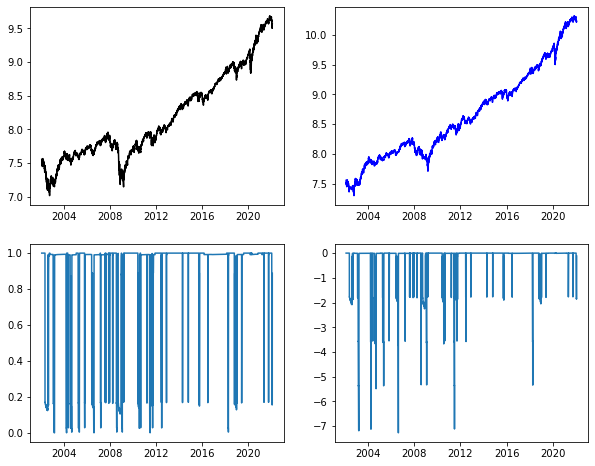



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2002-02-01
Successfully loaded params from ../data/pct_params/nasdaq_20yr_2param.json
{   'params': {   'amounts': [-0.976356870617924, 0.9654168886193454],
                  'qs': [-0.018651957320411805, -0.01]},
    'sd': 0.05722697714679787,
    'window': 230}
 1: Final value: $19629.41 (window = 230; sd = 0.057)

% in now: 0.9998833366563022
Actions taken: 21
Wrote params to ../data/pct_params/nasdaq_20yr_2param.json


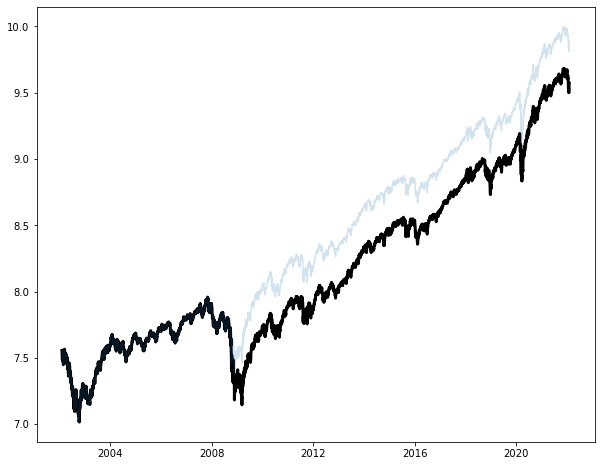

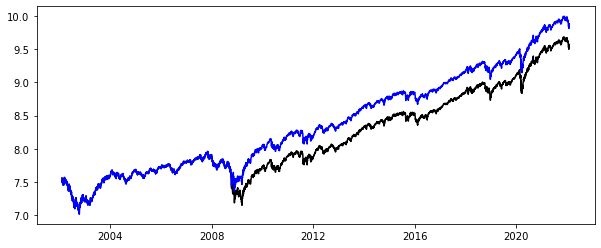

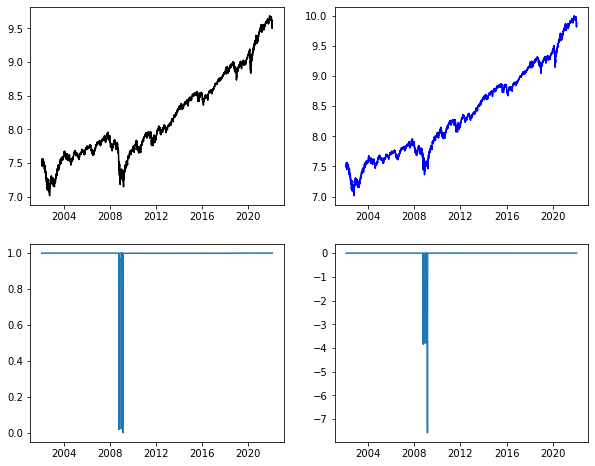



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2002-02-01
Successfully loaded params from ../data/pct_params/nasdaq_20yr_1param.json
{   'params': {'amounts': [0], 'qs': [-0.5530725938753147]},
    'sd': 0.04775669995519248,
    'window': 20}
 1: Final value: $14346.00 (window = 20; sd = 0.048)

% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nasdaq_20yr_1param.json


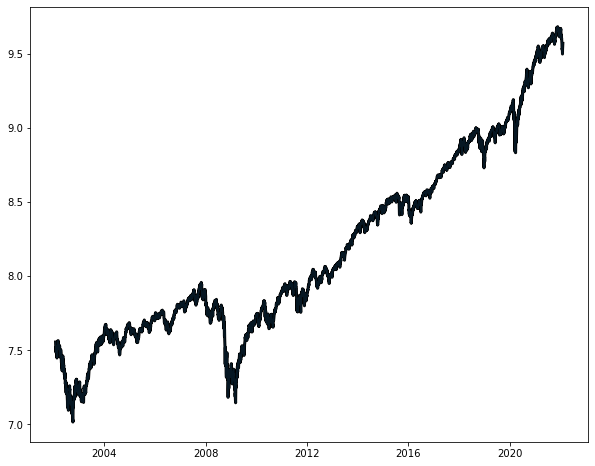

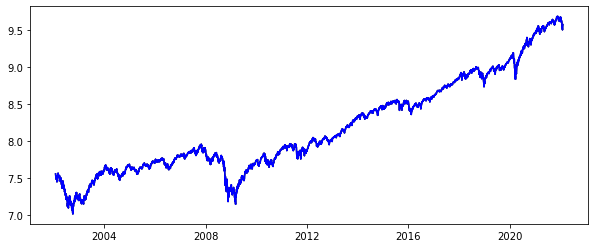

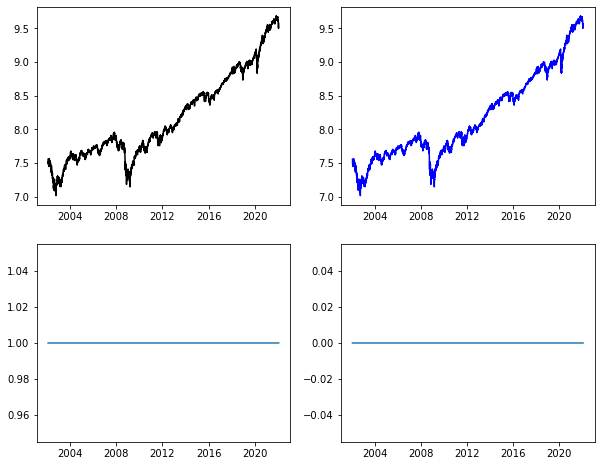

Percents in:
wilshire: [0.9906, 0.9999, 1.0]
nasdaq: [0.8871, 0.9999, 1.0]


In [4]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = []
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [3, 2, 1]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_{years_of_data}yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker].append(plot_results(best_data))
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()
print('Percents in:')
for k, v in percent_in.items():
    v = [round(val, 4) for val in v]
    print(f'{k}: {v}')